# **Отчёт о выполнении домашнего задания к лекции «Корреляция и корреляционный анализ»**

![](https://drive.google.com/uc?export=view&id=1rsVDD0YJocRYoP-EDazcwzoPnxJ3g9Sb)

> Рекомендую ознакомиться вот с этим [материалом](http://www.machinelearning.ru/wiki/index.php?title=Анализ_регрессионных_остатков_(пример)) для более подробного изучения графиков остатков

> А вот эти материалы пригодятся для понимания оптимизации моделей и дальнейшего погружения в тему:

> [1.](https://blog.quantinsti.com/linear-regression-models-scikit-learn/)   
> [2.](http://pavelbazin.com/post/linear-regression-hyperparameters/)

In [197]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

%load_ext lab_black
rcParams["figure.figsize"] = 11, 7

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


## В датасете [Mortality and Water Hardness](https://www.kaggle.com/ukveteran/mortality-and-water-hardness) содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.

## **Задание 1.**
## Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

- построить точечный график;   
- рассчитаитать коэффициенты корреляции Пирсона и Спирмена;   
- построить модель линейной регрессии;   
- рассчитать коэффициент детерминации;   
- вывести график остатков.   

## **Задание 2.**
## Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?   

- разделить данные на 2 группы;   
- повторить аналогичные шаги из пункта 1 для каждой группы по отдельности.

<div class="alert alert-block alert-info">

## **Задание 1**

In [198]:
# загрузка данных
df_mortality = pd.read_csv("/home/sk27/learning/STPY-37/corr/water.csv", index_col=0)

In [199]:
df_mortality

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18
...,...,...,...,...
57,South,Walsall,1527,60
58,South,West Bromwich,1627,53
59,South,West Ham,1486,122
60,South,Wolverhampton,1485,81


In [200]:
# формат и состав данных
df_mortality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.4+ KB


### Задача состоит в объяснении уровня сметроности величиной жёсткости воды. В связи с этим в качестве независимой перемнной рассматриваем hardness, в качстве зависимой mortality.

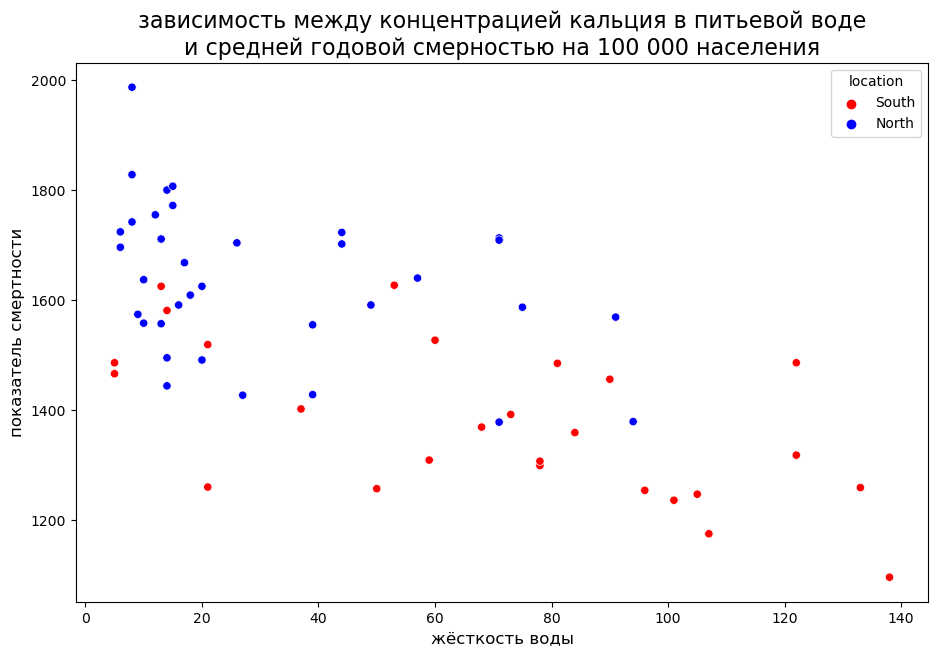

In [201]:
# точечный график
fig, ax = plt.subplots()
color_dict = dict({"North": "blue", "South": "red"})
sns.scatterplot(
    ax=ax,
    data=df_mortality,
    x="hardness",
    y="mortality",
    hue="location",
    palette=color_dict,
    legend="full",
)
ax.set_xlabel(
    "жёсткость воды",
    size=12,
)
ax.set_ylabel("показатель смертности", size=12)
ax.set_title(
    "зависимость между концентрацией кальция в питьевой воде\nи средней годовой смерностью на 100 000 населения",
    size=16,
)
plt.show()

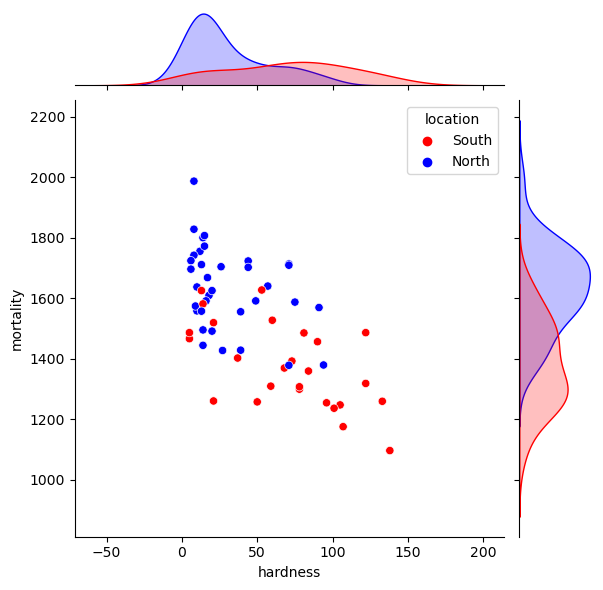

In [202]:
color_dict = dict({"North": "blue", "South": "red"})
sns.jointplot(
    x="hardness",
    y="mortality",
    data=df_mortality,
    hue="location",
    palette=color_dict,
)
plt.show()

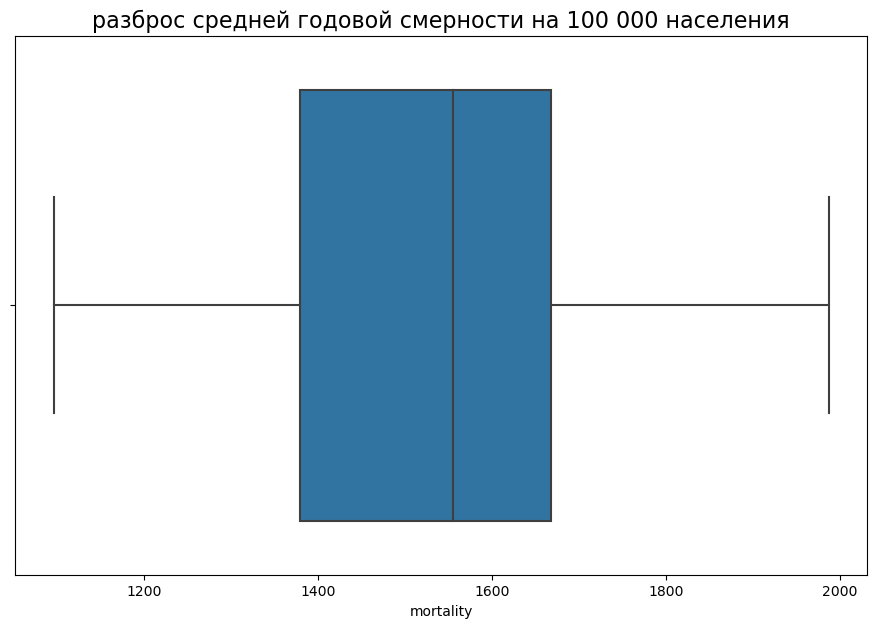

In [203]:
fig, ax = plt.subplots()
sns.boxplot(ax=ax, x=df_mortality.mortality)
ax.set_title(
    "разброс средней годовой смерности на 100 000 населения",
    size=16,
)
plt.show()

### Взаимосвязь, конечно, пристутствует, но разброс значений весьма велик. На высокую точность прогнозировыания с использованием модели линейной регрессии рассчитывать не стоит.
### Стройную картину портит Север. Очевидно, что там присутствуют неизученные факторы, повышающие размах показателя смертности в районах с низкой жёсткостью воды.

In [227]:
# коэффициент корреляции Пирсона
corr_pirson = df_mortality[["hardness", "mortality"]].corr().min()[0].round(5)
print(f"Коэффициент корреляции Пирсона: {corr_pirson}")
# коэффициент корреляции Спирмана
corr_spearman = (
    df_mortality[["hardness", "mortality"]].corr(method="spearman").min()[0].round(5)
)
print(f"Коэффициент корреляции Спирмана: {corr_spearman}")

Коэффициент корреляции Пирсона: -0.65485
Коэффициент корреляции Спирмана: -0.63166


In [228]:
# линейная регрессия
X, y = df_mortality[["hardness"]], df_mortality["mortality"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=27
)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [229]:
# проверим качество модели сравнением среднеквадратического отклонения в предсказанных данных по обучающей и тестовой выборкам
print(f"MSE обучающей выборки: {mean_squared_error(y_train, model.predict(X_train))}")
print(f"MSE тестовой выборки: {mean_squared_error(y_test, model.predict(X_test))}")
print(
    f"Отношение MSE: {(mean_squared_error(y_train, model.predict(X_train)) / mean_squared_error(y_test, model.predict(X_test))).round(2)}"
)

MSE обучающей выборки: 19920.742141872503
MSE тестовой выборки: 20481.698566505027
Отношение MSE: 0.97


In [230]:
print(f"Коэффициент детерминации: {model.score(X_test, y_test)}")

Коэффициент детерминации: 0.34922354865540517


#### О. Булыгин:
> я бы особо отметил в выводах, что при разделении датасета данных просто остается очень мало для построения адекватной модели, это как раз и видно по коэффициентам детерминации (мы тут не можем с уверенностью судить о наличии/отсутствии взаимосвязи).

### Возможно, использование location в качестве дополнительного предиктора повысит точность прогноза? Тем более, что про особенность Севера уже было сказано. 

In [231]:
df_mortality_2 = df_mortality.replace({"location": {"North": 0, "South": 1}})

In [232]:
df_mortality_2

,location,town,mortality,hardness,predict_mortality,predict_mortality_2,residual,residual_2
1,1,Bath,1247,105,1322.0,1292.0,-75.0,-45.0
2,0,Birkenhead,1668,17,1605.0,1652.0,63.0,16.0
3,1,Birmingham,1466,5,1644.0,1516.0,-178.0,-50.0
4,0,Blackburn,1800,14,1615.0,1659.0,185.0,141.0
5,0,Blackpool,1609,18,1602.0,1650.0,7.0,-41.0
...,...,...,...,...,...,...,...,...
57,1,Walsall,1527,60,1467.0,1393.0,60.0,134.0
58,1,West Bromwich,1627,53,1490.0,1408.0,137.0,219.0
59,1,West Ham,1486,122,1268.0,1254.0,218.0,232.0
60,1,Wolverhampton,1485,81,1399.0,1346.0,86.0,139.0


In [233]:
X_2, y_2 = df_mortality_2[["location", "hardness"]], df_mortality_2["mortality"]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, y_2, test_size=0.2, random_state=27
)
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)

LinearRegression()

In [234]:
print(
    f"MSE обучающей выборки: {mean_squared_error(y_train_2, model_2.predict(X_train_2))}"
)
print(
    f"MSE тестовой выборки: {mean_squared_error(y_test_2, model_2.predict(X_test_2))}"
)
print(
    f"Отношение MSE: {(mean_squared_error(y_train_2, model_2.predict(X_train_2)) / mean_squared_error(y_test_2, model_2.predict(X_test_2))).round(2)}"
)

MSE обучающей выборки: 14695.628428899196
MSE тестовой выборки: 12895.209014114469
Отношение MSE: 1.14


In [235]:
print(f"Коэффициент детерминации: {model_2.score(X_test_2, y_test_2)}")

Коэффициент детерминации: 0.590273319651524


### Несколько лучше. Рассмотрим оба варианта

In [236]:
df_mortality["predict_mortality"] = model.predict(df_mortality[["hardness"]]).round(0)

In [237]:
df_mortality["predict_mortality_2"] = model_2.predict(
    df_mortality_2[["location", "hardness"]]
).round(0)

In [238]:
# вычислим остатки
df_mortality["residual"] = df_mortality.mortality - df_mortality.predict_mortality
df_mortality["residual_2"] = df_mortality.mortality - df_mortality.predict_mortality_2

### График остатков

In [239]:
df_mortality

,location,town,mortality,hardness,predict_mortality,predict_mortality_2,residual,residual_2
1,South,Bath,1247,105,1322.0,1292.0,-75.0,-45.0
2,North,Birkenhead,1668,17,1605.0,1652.0,63.0,16.0
3,South,Birmingham,1466,5,1644.0,1516.0,-178.0,-50.0
4,North,Blackburn,1800,14,1615.0,1659.0,185.0,141.0
5,North,Blackpool,1609,18,1602.0,1650.0,7.0,-41.0
...,...,...,...,...,...,...,...,...
57,South,Walsall,1527,60,1467.0,1393.0,60.0,134.0
58,South,West Bromwich,1627,53,1490.0,1408.0,137.0,219.0
59,South,West Ham,1486,122,1268.0,1254.0,218.0,232.0
60,South,Wolverhampton,1485,81,1399.0,1346.0,86.0,139.0


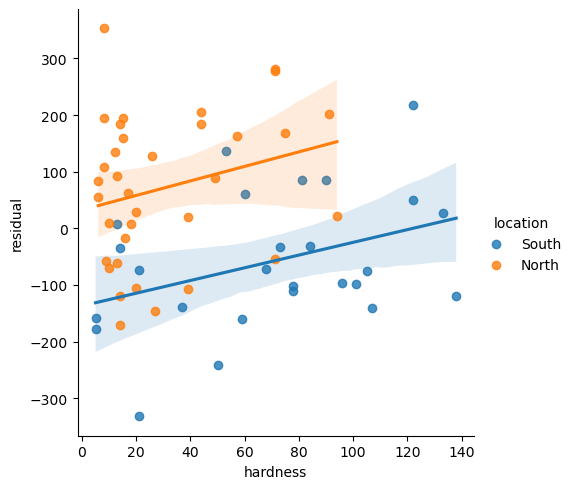

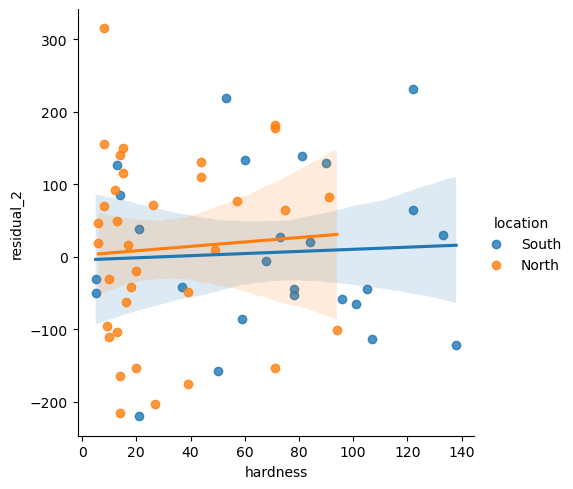

In [240]:
sns.lmplot(x="hardness", y="residual", hue="location", data=df_mortality)
sns.lmplot(x="hardness", y="residual_2", hue="location", data=df_mortality)
plt.show()

<div class="alert alert-block alert-info">

## **Задание 2**

### Косвенно мы уже ответили на вопрос второго задания: при использовании location в качестве предиктора в модели линейной регрессии качество прогноза несколько улучшилось. В случае, если бы в одном из регионов взаимосвязь отсутствовала, такого улучшения бы не наблюдалось.

### Весьма удачно, что значение локации принимает всего два значения. Это позволяет применить для оценки наличия взаимосвязи между смертностью и жёсткостью воды раздельно для каждого региона следующий подход: с использованием логистической регрессии спрогнозировать локацию, используя в качестве предикторов значения смертности и жёсткости воды, а затем сравнить предсказанные значения локации с фактическими.

In [241]:
df_mortality_2

,location,town,mortality,hardness,predict_mortality,predict_mortality_2,residual,residual_2
1,1,Bath,1247,105,1322.0,1292.0,-75.0,-45.0
2,0,Birkenhead,1668,17,1605.0,1652.0,63.0,16.0
3,1,Birmingham,1466,5,1644.0,1516.0,-178.0,-50.0
4,0,Blackburn,1800,14,1615.0,1659.0,185.0,141.0
5,0,Blackpool,1609,18,1602.0,1650.0,7.0,-41.0
...,...,...,...,...,...,...,...,...
57,1,Walsall,1527,60,1467.0,1393.0,60.0,134.0
58,1,West Bromwich,1627,53,1490.0,1408.0,137.0,219.0
59,1,West Ham,1486,122,1268.0,1254.0,218.0,232.0
60,1,Wolverhampton,1485,81,1399.0,1346.0,86.0,139.0


In [242]:
# постоим и обучим модель логистической регрессии
X, y = df_mortality_2[["mortality", "hardness"]], df_mortality_2["location"]
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X, y, test_size=0.2, random_state=27
)
model_l = LogisticRegression()
model_l.fit(X_train_l, y_train_l)

LogisticRegression()

In [243]:
# используем модель для прогнозирования
df_mortality_2.insert(
    1,
    "location_predict",
    model_l.predict(df_mortality_2[["mortality", "hardness"]]).round(0),
)
df_mortality_2["location_error"] = (
    df_mortality_2.location != df_mortality_2.location_predict
)

In [244]:
df_mortality_2

,location,location_predict,town,mortality,hardness,predict_mortality,predict_mortality_2,residual,residual_2,location_error
1,1,1,Bath,1247,105,1322.0,1292.0,-75.0,-45.0,False
2,0,0,Birkenhead,1668,17,1605.0,1652.0,63.0,16.0,False
3,1,1,Birmingham,1466,5,1644.0,1516.0,-178.0,-50.0,False
4,0,0,Blackburn,1800,14,1615.0,1659.0,185.0,141.0,False
5,0,0,Blackpool,1609,18,1602.0,1650.0,7.0,-41.0,False
...,...,...,...,...,...,...,...,...,...,...
57,1,0,Walsall,1527,60,1467.0,1393.0,60.0,134.0,True
58,1,0,West Bromwich,1627,53,1490.0,1408.0,137.0,219.0,True
59,1,1,West Ham,1486,122,1268.0,1254.0,218.0,232.0,False
60,1,1,Wolverhampton,1485,81,1399.0,1346.0,86.0,139.0,False


In [245]:
# коэффициент корреляции Пирсона
corr_pirson_locftion = (
    df_mortality_2[["location", "location_predict"]].corr().min()[0].round(5)
)
print(f"Коэффициент корреляции Пирсона: {corr_pirson_locftion}")
# коэффициент корреляции Спирмана
corr_spearman_locftion = (
    df_mortality_2[["location", "location_predict"]]
    .corr(method="spearman")
    .min()[0]
    .round(5)
)
print(f"Коэффициент корреляции Спирмана: {corr_spearman_locftion}")

Коэффициент корреляции Пирсона: 0.62984
Коэффициент корреляции Спирмана: 0.62984


### Оценим долю ошибочных прогнозов, полученных с применением модели логистической регрессии, для каждой локации.

In [246]:
df_location_error = (
    df_mortality_2.groupby(["location", "location_error"]).count().reset_index()
)

In [247]:
df_location_error = df_location_error[
    ["location", "location_error", "location_predict"]
].rename({"location_predict": "count"}, axis=1)

In [248]:
df_result = pd.DataFrame()
for location in df_location_error.location.unique():
    loct = "North" if location == 0 else "South"
    df_result = pd.DataFrame(
        df_location_error[
            (df_location_error.location == location)
            & (df_location_error.location_error == True)
        ]["count"]
        / df_location_error[df_location_error.location == location]["count"].sum()
    )
    print(f"Доля неверных прогнозов для локации {loct}: {df_result.sum()[0].round(2)}")

Доля неверных прогнозов для локации North: 0.14
Доля неверных прогнозов для локации South: 0.23


### На основании проведёного анализа можно сделать вывод о том, что выявленная зависимость между смертностью и жёсткостью воды присутствует как в северных, так и в южных городах.

In [1]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 3.9 MB/s eta 0:00:0000:0100:01m
